
=== Reverted CategoricalNB ===
Accuracy: 0.6143
              precision    recall  f1-score   support

           0       0.63      0.92      0.74       456
           1       0.78      0.80      0.79       539
           2       0.74      0.32      0.44       209
           3       0.67      0.08      0.15        24
           4       0.55      0.15      0.24        39
           5       0.52      0.56      0.54       674
           6       0.52      0.60      0.56       596
           7       1.00      0.35      0.52        17
           8       0.62      0.18      0.28        28
           9       0.75      0.57      0.64       152
          10       1.00      0.08      0.15        38
          11       0.65      0.35      0.45       228

    accuracy                           0.61      3000
   macro avg       0.70      0.41      0.46      3000
weighted avg       0.63      0.61      0.60      3000



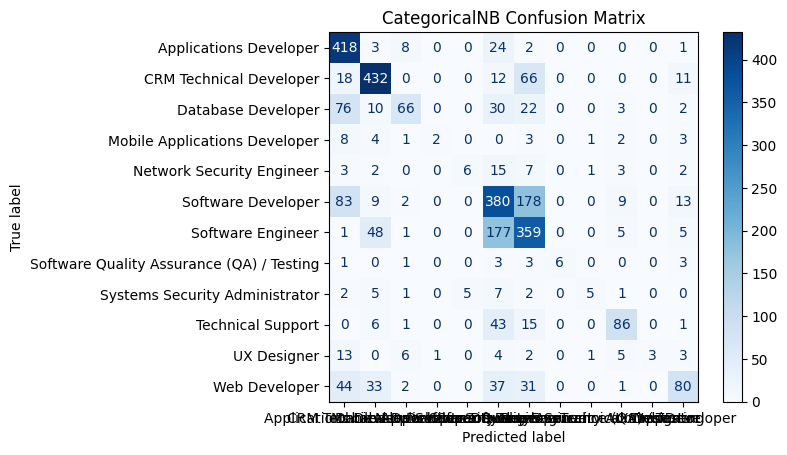


=== Enhanced MultinomialNB ===
Accuracy: 0.4713
              precision    recall  f1-score   support

           0       0.40      0.88      0.54       456
           1       0.56      0.74      0.64       539
           2       0.90      0.22      0.35       209
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        39
           5       0.48      0.26      0.34       674
           6       0.45      0.51      0.48       596
           7       1.00      0.41      0.58        17
           8       0.33      0.07      0.12        28
           9       0.38      0.36      0.37       152
          10       0.50      0.18      0.27        38
          11       1.00      0.08      0.15       228

    accuracy                           0.47      3000
   macro avg       0.50      0.31      0.32      3000
weighted avg       0.53      0.47      0.43      3000



c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 

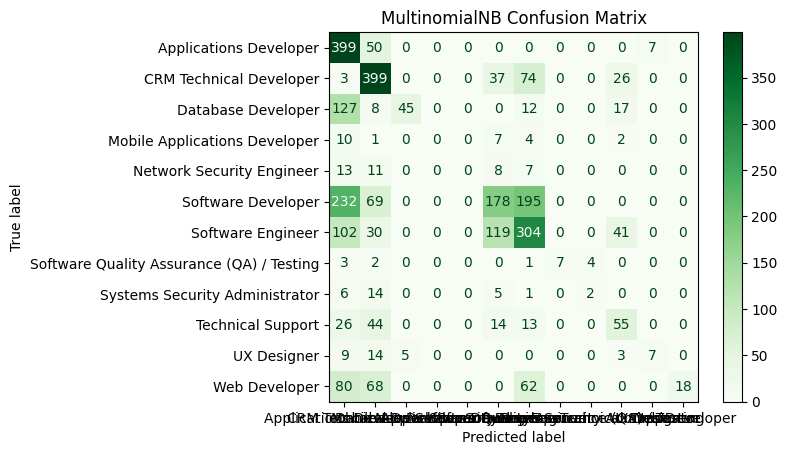

C:\Users\vbhav\AppData\Local\Temp\ipykernel_21864\2249806604.py:141: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_binary = X_train[binary_cols].replace({"yes": 1, "no": 0})
C:\Users\vbhav\AppData\Local\Temp\ipykernel_21864\2249806604.py:142: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_binary = X_test[binary_cols].replace({"yes": 1, "no": 0})
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



=== Improved BernoulliNB ===
Accuracy: 0.3910
              precision    recall  f1-score   support

           0       0.46      0.68      0.55       456
           1       0.43      0.75      0.54       539
           2       0.22      0.37      0.27       209
           3       0.07      0.12      0.09        24
           4       0.09      0.23      0.12        39
           5       0.55      0.11      0.18       674
           6       0.49      0.25      0.33       596
           7       0.35      0.41      0.38        17
           8       0.33      0.07      0.12        28
           9       0.36      0.59      0.44       152
          10       0.29      0.29      0.29        38
          11       0.31      0.19      0.24       228

    accuracy                           0.39      3000
   macro avg       0.33      0.34      0.30      3000
weighted avg       0.43      0.39      0.36      3000



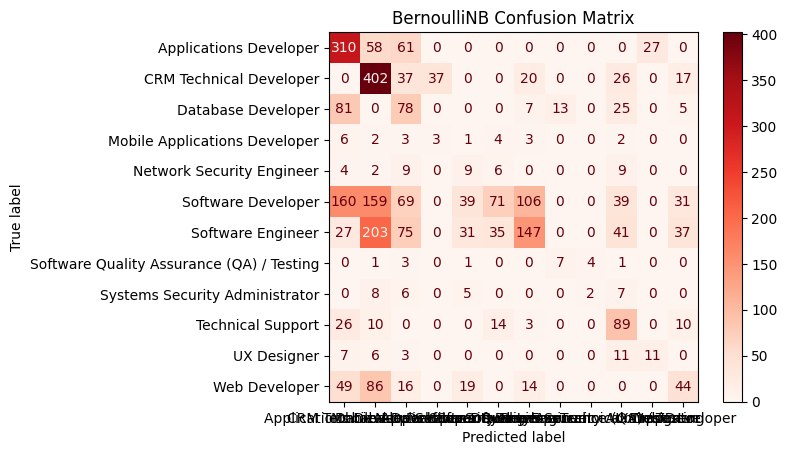

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import (
    MinMaxScaler, 
    LabelEncoder, 
    OrdinalEncoder, 
    KBinsDiscretizer
)
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, BernoulliNB
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    precision_recall_fscore_support 
)
from sklearn.utils.validation import check_array
from scipy.sparse import hstack

# Load and preprocess data
df = pd.read_csv('cleaned_data.csv')
# Feature engineering
df['memory_work_ethic'] = df['memory capability score'].astype(str) + "_" + df['hard/smart worker']
df['num_keywords'] = df['keywords'].apply(lambda x: len(x.split(', ')))

# Feature lists
numeric_features = [
    "Logical quotient rating", 
    "hackathons", 
    "coding skills rating",
    "public speaking points",
    "memory capability score"
]

binary_cols = [
    "self-learning capability?", 
    "Extra-courses did", 
    "worked in teams ever?", 
    "Introvert"
]

categorical_cols = [
    "keywords", "workshops", "reading and writing skills",
    "certifications", "Interested subjects", "interested career area ",
    "Type of company want to settle in?", "Interested Type of Books",
    "Management or Technical", "hard/smart worker", "memory capability score"
]


# Convert scores to numeric
score_map = {"poor": 1, "medium": 2, "excellent": 3}
df["memory capability score"] = df["memory capability score"].str.lower().map(score_map)
df["public speaking points"] = df["public speaking points"].astype(int)

# Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["SuggestedJobRole"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("SuggestedJobRole", axis=1), 
    y, 
    test_size=0.3, 
    random_state=42
)

# Encode categorical features using LabelEncoder
X_train_cat = X_train[categorical_cols].apply(LabelEncoder().fit_transform)
X_test_cat = X_test[categorical_cols].apply(lambda col: LabelEncoder().fit(col).transform(col))

# Handle potential missing categories in test set by filling with -1
X_test_cat = X_test_cat.where(pd.notnull(X_test_cat), -1)

# Train and evaluate
catnb = CategoricalNB(min_categories=10)
catnb.fit(X_train_cat, y_train)
y_pred = catnb.predict(X_test_cat)

print("\n=== Reverted CategoricalNB ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('CategoricalNB Confusion Matrix')
plt.show()


# ========== Enhanced MultinomialNB ==========
# Text processing
tfidf = TfidfVectorizer(
    tokenizer=lambda x: x.split(", "),
    ngram_range=(1, 2),
    max_features=1000,
    sublinear_tf=True
)

# Feature scaling
scaler = MinMaxScaler()

# Prepare features
X_train_keywords = tfidf.fit_transform(X_train['keywords'])
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_train_multi = hstack([X_train_keywords, X_train_numeric])

X_test_keywords = tfidf.transform(X_test['keywords'])
X_test_numeric = scaler.transform(X_test[numeric_features])
X_test_multi = hstack([X_test_keywords, X_test_numeric])

# Train and evaluate
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_multi, y_train)
y_pred_multi = mnb.predict(X_test_multi)

print("\n=== Enhanced MultinomialNB ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_multi):.4f}")
print(classification_report(y_test, y_pred_multi))

# Confusion Matrix
cm_multi = confusion_matrix(y_test, y_pred_multi)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=label_encoder.classes_)
disp_multi.plot(cmap='Greens')
plt.title('MultinomialNB Confusion Matrix')
plt.show()

# ========== Improved BernoulliNB ==========
# Binary features
vectorizer_bern = CountVectorizer(
    tokenizer=lambda x: x.split(", "),
    binary=True,
    max_features=500,
    ngram_range=(1, 2)
)

X_train_binary = X_train[binary_cols].replace({"yes": 1, "no": 0})
X_test_binary = X_test[binary_cols].replace({"yes": 1, "no": 0})

# Combine features
X_train_bern = hstack([
    vectorizer_bern.fit_transform(X_train['keywords']),
    X_train_binary,
    X_train[['num_keywords']]
])

X_test_bern = hstack([
    vectorizer_bern.transform(X_test['keywords']),
    X_test_binary,
    X_test[['num_keywords']]
])

# Train and evaluate
bnb = BernoulliNB(alpha=0.25)
bnb.fit(X_train_bern, y_train)
y_pred_bern = bnb.predict(X_test_bern)

print("\n=== Improved BernoulliNB ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bern):.4f}")
print(classification_report(y_test, y_pred_bern))

# Confusion Matrix
cm_bern = confusion_matrix(y_test, y_pred_bern)
disp_bern = ConfusionMatrixDisplay(confusion_matrix=cm_bern, display_labels=label_encoder.classes_)
disp_bern.plot(cmap='Reds')
plt.title('BernoulliNB Confusion Matrix')
plt.show()


=== Training/Test Samples ===
CategoricalNB:
Training shape: (7000, 11)
Sample:
      keywords  workshops  reading and writing skills  certifications  \
9069        44          4                           0               1   
2603        36          3                           1               2   

      Interested subjects  interested career area   \
9069                    6                        2   
2603                    1                        1   

      Type of company want to settle in?  Interested Type of Books  \
9069                                   6                         1   
2603                                   0                         2   

      Management or Technical  hard/smart worker  memory capability score  
9069                        0                  0                        1  
2603                        1                  0                        1  

Test shape: (3000, 11)
Sample:
      keywords  workshops  reading and writing skills  certificat

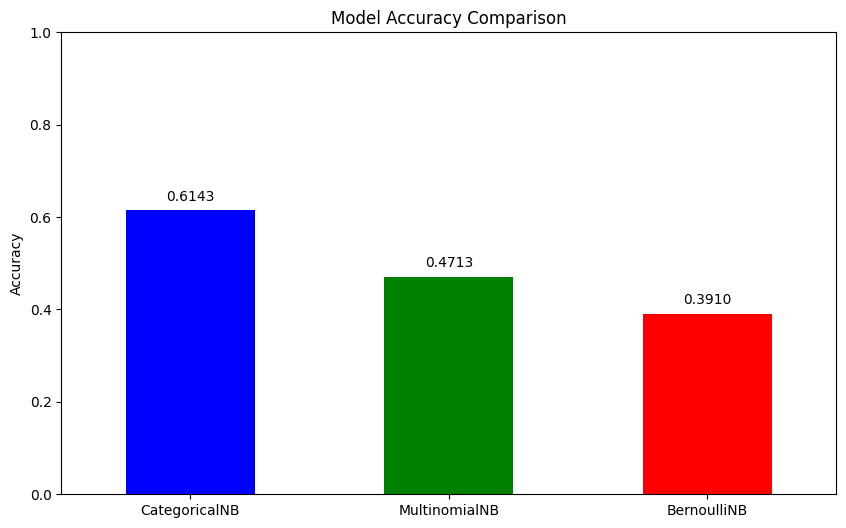

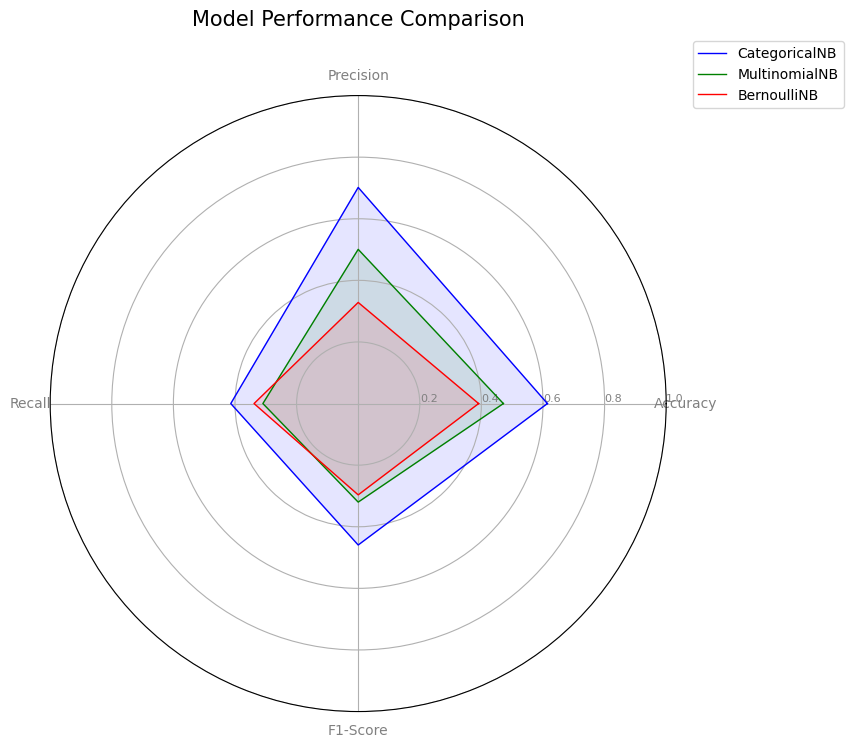


=== Model Comparison Metrics ===
               Accuracy  Precision    Recall  F1-Score
CategoricalNB  0.614333   0.701699  0.413699  0.459244
MultinomialNB  0.471333   0.500642  0.309411  0.319974
BernoulliNB    0.391000   0.328301  0.338149  0.296487


In [11]:
# Print training/test sample info for each model
print("\n=== Training/Test Samples ===")

# For CategoricalNB (DataFrame-based)
print("CategoricalNB:")
print(f"Training shape: {X_train_cat.shape}\nSample:")
print(X_train_cat.head(2))
print(f"\nTest shape: {X_test_cat.shape}\nSample:")
print(X_test_cat.head(2))

# For MultinomialNB (sparse matrices)
print("\nMultinomialNB:")
print(f"Training shape: {X_train_multi.shape}")
print("First TRAINING row (dense):", X_train_multi.tocsr()[0].toarray())
print(f"\nTest shape: {X_test_multi.shape}")
print("First TEST row (dense):", X_test_multi.tocsr()[0].toarray())

# For BernoulliNB (sparse matrices)
print("\nBernoulliNB:")
print(f"Training shape: {X_train_bern.shape}")
print("First TRAINING row (dense):", X_train_bern.tocsr()[0].toarray())
print(f"\nTest shape: {X_test_bern.shape}")
print("First TEST row (dense):", X_test_bern.tocsr()[0].toarray())
# Model comparison visualization
def model_comparison_visualization(y_true, *models_data):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    model_names = []
    scores = []
    
    for name, y_pred in models_data:
        model_names.append(name)
        accuracy = accuracy_score(y_true, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_true, y_pred, average='macro', zero_division=0
        )
        scores.append([accuracy, precision, recall, f1])
    
    scores_df = pd.DataFrame(scores, columns=metrics, index=model_names)
    
    # Bar plot for accuracy comparison
    plt.figure(figsize=(10, 6))
    scores_df['Accuracy'].plot(kind='bar', color=['blue', 'green', 'red'])
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    for i, v in enumerate(scores_df['Accuracy']):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center')
    plt.show()
    
    # Radar chart for full metrics comparison
    categories = metrics
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    
    for idx, (model, row) in enumerate(zip(model_names, scores_df.values)):
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', 
                label=model, color=['blue', 'green', 'red'][idx])
        ax.fill(angles, values, alpha=0.1, color=['blue', 'green', 'red'][idx])
    
    plt.xticks(angles[:-1], categories, color='grey', size=10)
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2","0.4","0.6","0.8","1.0"], 
               color="grey", size=8)
    plt.ylim(0, 1)
    plt.title('Model Performance Comparison', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()
    
    return scores_df

# Generate visualizations
comparison_df = model_comparison_visualization(
    y_test,
    ('CategoricalNB', y_pred),
    ('MultinomialNB', y_pred_multi),
    ('BernoulliNB', y_pred_bern)
)

print("\n=== Model Comparison Metrics ===")
print(comparison_df)

## Decision Tree


=== Dataset Splits ===
Training samples:       Logical quotient rating  hackathons  coding skills rating  \
9069                      5.0         3.0                   9.0   
2603                      1.0         2.0                   6.0   
7738                      3.0         4.0                   4.0   
1579                      7.0         3.0                   8.0   
5058                      4.0         6.0                   3.0   

      public speaking points  self-learning capability?  Extra-courses did  \
9069                     6.0                          1                  1   
2603                     6.0                          1                  1   
7738                     8.0                          1                  0   
1579                     4.0                          1                  1   
5058                     6.0                          1                  0   

            certifications         workshops reading and writing skills  \
9069       

c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


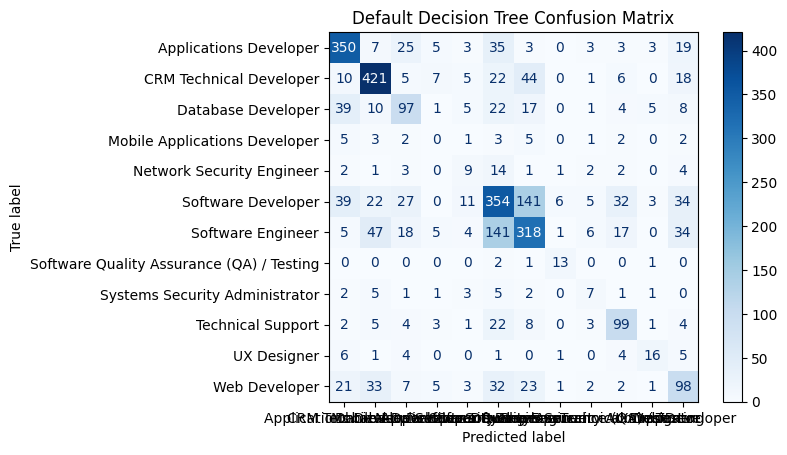


=== Entropy-Limited Tree ===
Accuracy: 0.2137
              precision    recall  f1-score   support

           0       0.29      0.35      0.32       456
           1       0.94      0.38      0.54       539
           2       0.14      0.05      0.07       209
           3       0.00      0.00      0.00        24
           4       0.05      0.38      0.09        39
           5       0.51      0.06      0.11       674
           6       0.44      0.29      0.35       596
           7       0.32      0.35      0.33        17
           8       0.00      0.00      0.00        28
           9       0.00      0.00      0.00       152
          10       0.02      0.84      0.05        38
          11       0.00      0.00      0.00       228

    accuracy                           0.21      3000
   macro avg       0.23      0.23      0.15      3000
weighted avg       0.43      0.21      0.25      3000



c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


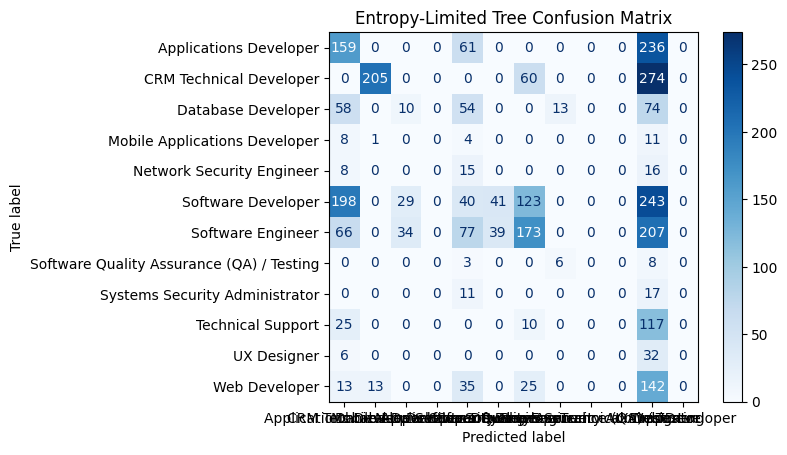


=== Regularized Tree ===
Accuracy: 0.3560
              precision    recall  f1-score   support

           0       0.31      0.75      0.44       456
           1       0.36      0.73      0.48       539
           2       0.00      0.00      0.00       209
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00       674
           6       0.43      0.55      0.48       596
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        28
           9       0.00      0.00      0.00       152
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00       228

    accuracy                           0.36      3000
   macro avg       0.09      0.17      0.12      3000
weighted avg       0.20      0.36      0.25      3000



c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


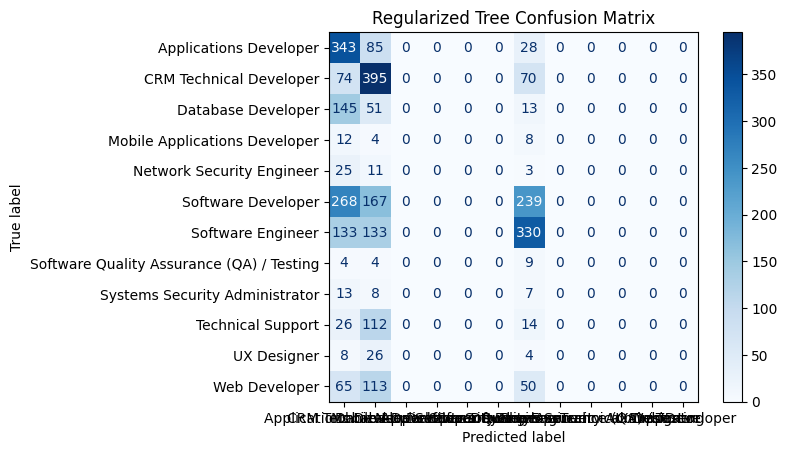

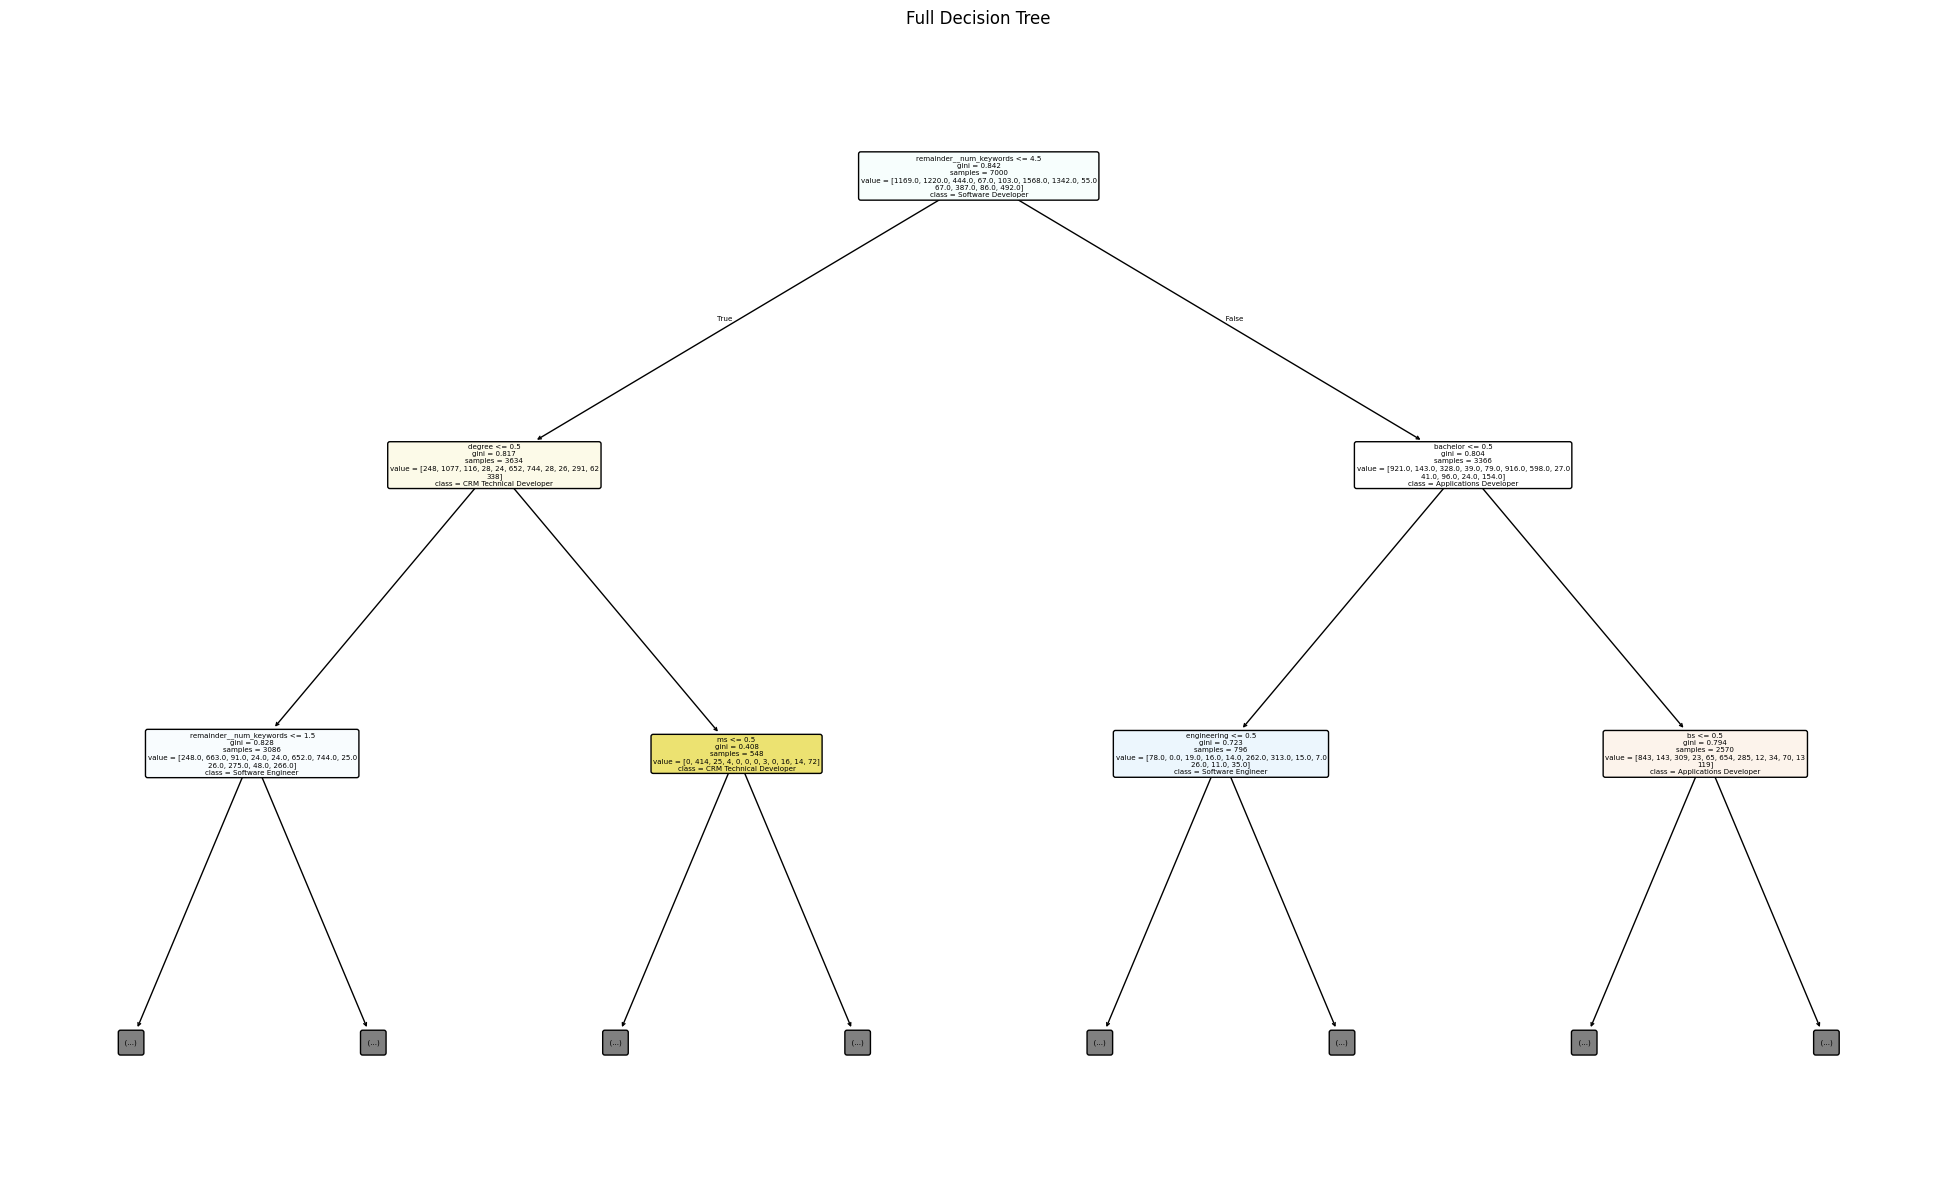

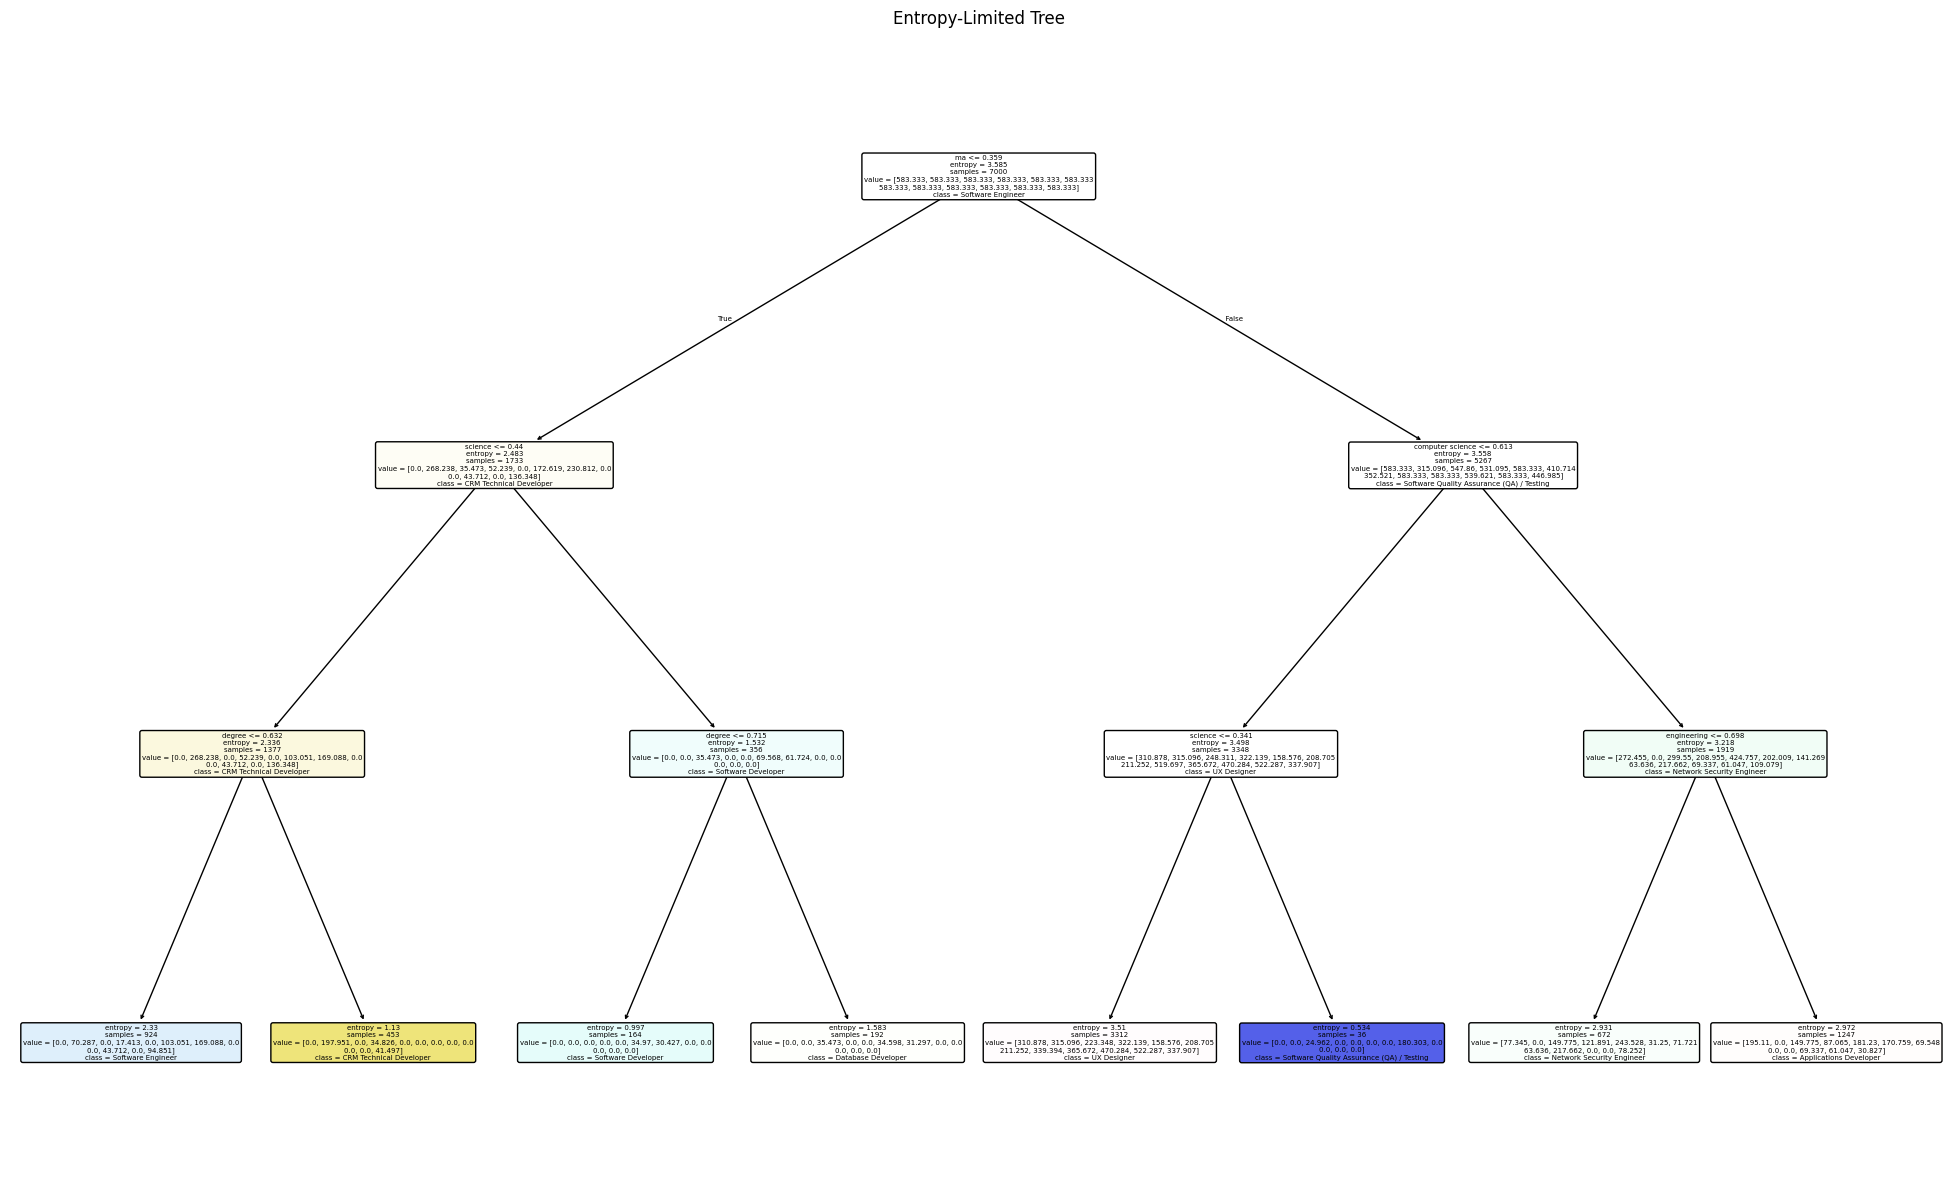

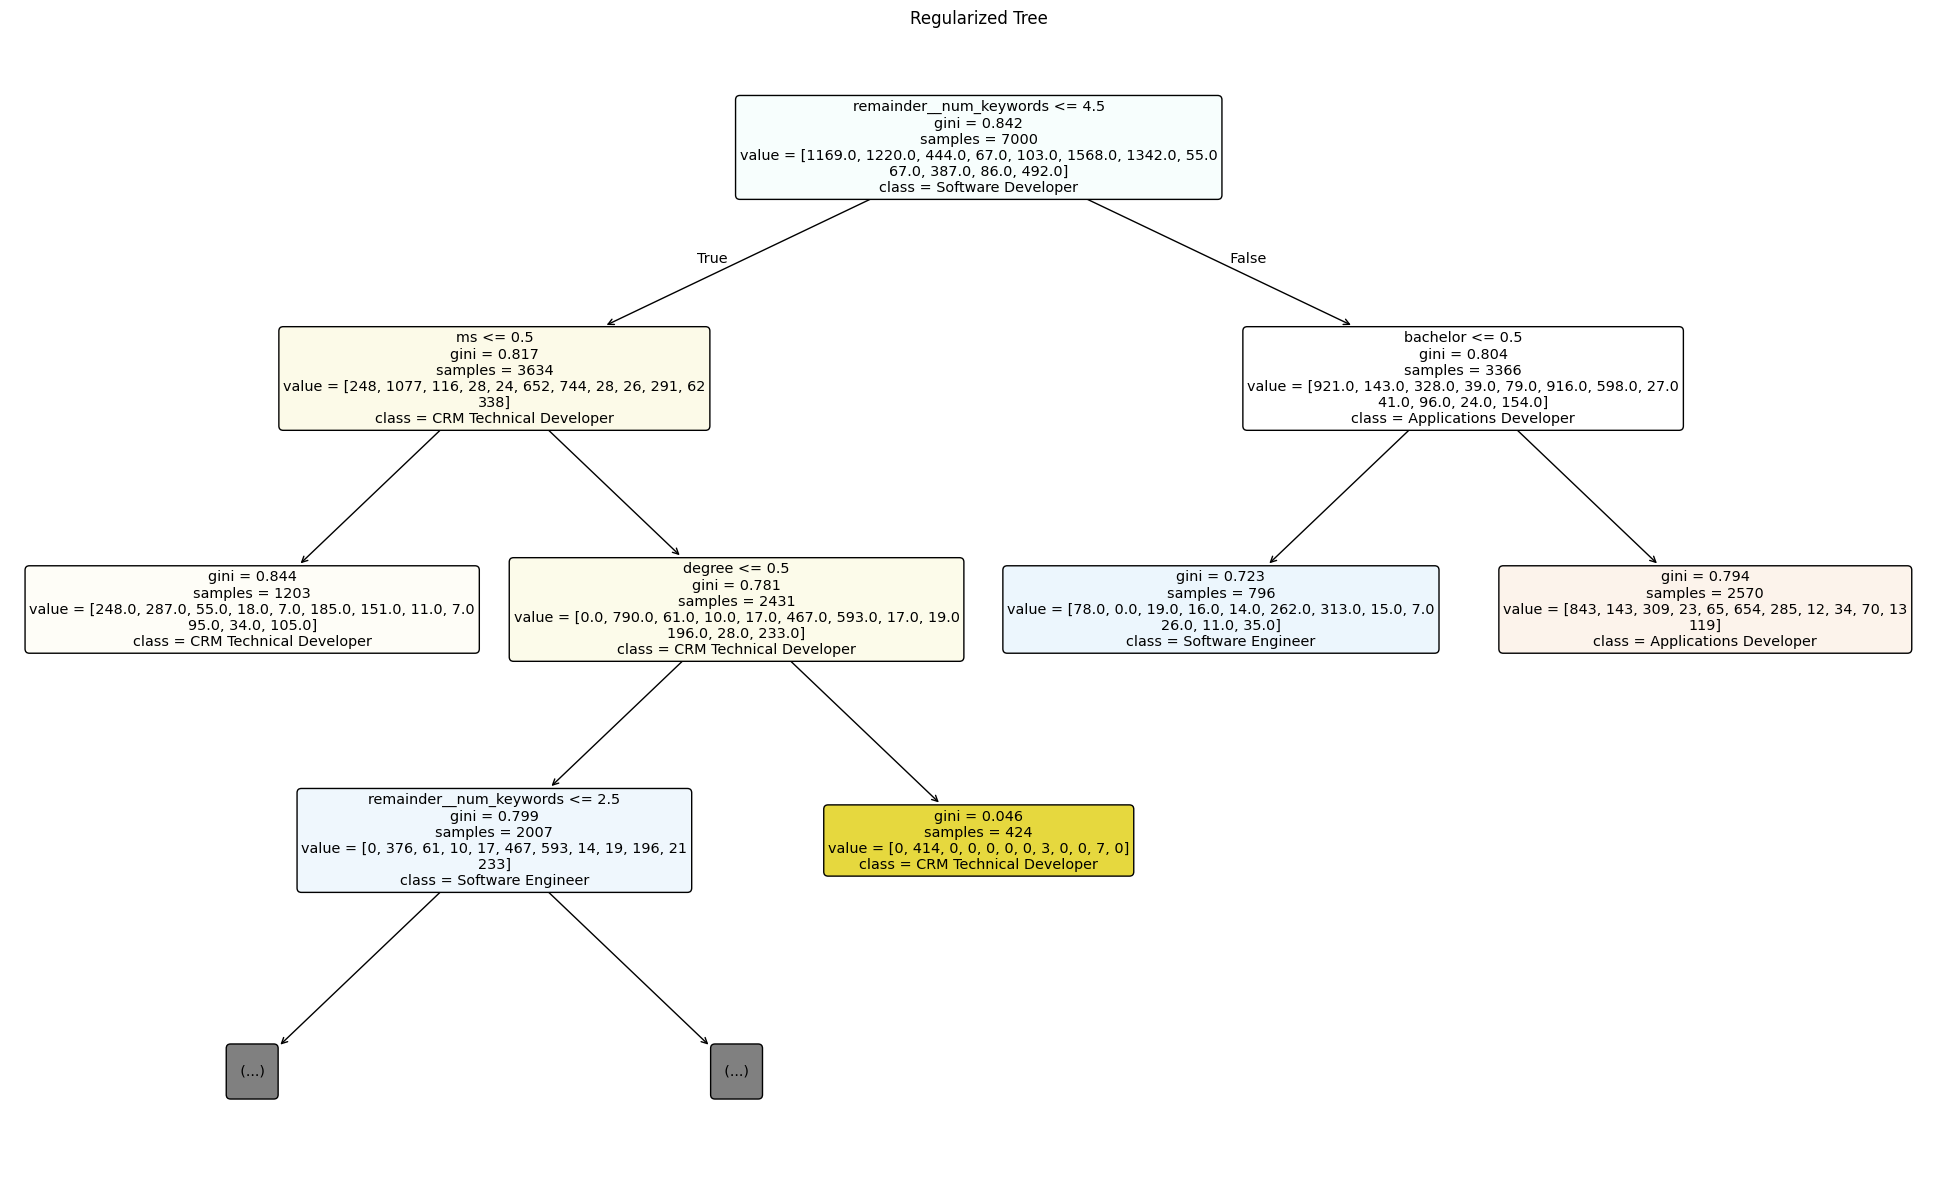

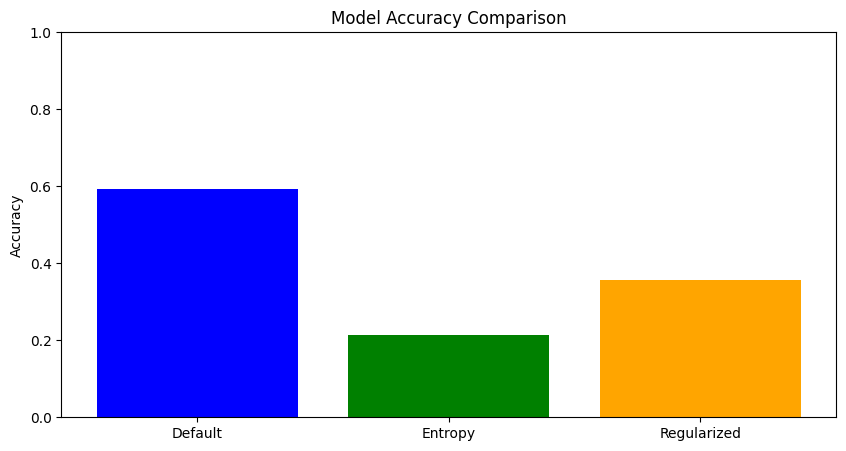

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack, csr_matrix

# Load data
df = pd.read_csv('cleaned_data.csv')


# ================== Feature Engineering ==================
df['keywords'] = df['keywords'].fillna('')
df['memory_work_ethic'] = df['memory capability score'].astype(str) + "_" + df['hard/smart worker']
df['num_keywords'] = df['keywords'].apply(lambda x: len(x.split(', ')))

# ================== Column Definitions ==================
numeric_features = [
    "Logical quotient rating", 
    "hackathons", 
    "coding skills rating",
    "public speaking points",
    "memory capability score",
    "num_keywords"
]

binary_cols = [
    "self-learning capability?", 
    "Extra-courses did", 
    "worked in teams ever?", 
    "Introvert"
]

categorical_cols = [
    "Interested subjects", 
    "Type of company want to settle in?",
    "Interested Type of Books", 
    "Management or Technical", 
    "hard/smart worker",
    "certifications", 
    "workshops", 
    "reading and writing skills",
    "memory_work_ethic",
    "interested career area ",  # With trailing space
    "Taken inputs from seniors or elders"
]

# ================== Data Validation ==================
required_columns = set(numeric_features + binary_cols + categorical_cols + ["SuggestedJobRole", "keywords"])
missing_columns = required_columns - set(df.columns)
if missing_columns:
    raise ValueError(f"Missing columns: {missing_columns}")

# ================== Preprocessing ==================
# Process binary columns
binary_map = {'yes': 1, 'no': 0}
for col in binary_cols:
    df[col] = df[col].astype(str).str.lower().map(binary_map).fillna(0).astype(int)

# Convert numeric features
for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0.0).astype(float)

# Clean categorical columns
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()

# Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["SuggestedJobRole"])

# Split data
X = df.drop(["SuggestedJobRole", "keywords"], axis=1)
keywords = df["keywords"]

# Train-test split (THIS DEFINES X_train)
X_train, X_test, y_train, y_test, keywords_train, keywords_test = train_test_split(
    X, y, keywords, test_size=0.3, random_state=42
)
print(f"\n=== Dataset Splits ===")
print(f"Training samples: {X_train.head()}")
print(f"Testing samples: {X_test.head()}")
# ================== Pipeline Construction ==================
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(
            handle_unknown='use_encoded_value', 
            unknown_value=-1,
            encoded_missing_value=-1
        ), categorical_cols)
    ],
    remainder='passthrough'
)

# Process features
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert to float and sparse matrices
X_train_processed = csr_matrix(X_train_processed.astype(float))
X_test_processed = csr_matrix(X_test_processed.astype(float))

# Keyword processing
vectorizer = CountVectorizer(
    tokenizer=lambda x: x.split(", "), 
    max_features=50, 
    binary=True,
    dtype=np.float64
)
keywords_train = vectorizer.fit_transform(keywords_train)
keywords_test = vectorizer.transform(keywords_test)

# Combine features
X_train_final = hstack([X_train_processed, keywords_train])
X_test_final = hstack([X_test_processed, keywords_test])

# Get feature names
ct_features = preprocessor.get_feature_names_out()
all_features = np.concatenate([ct_features, vectorizer.get_feature_names_out()])

# ========== Decision Tree Models with Different Root Nodes ==========
# Model 1: Default parameters with feature subset
dt1 = DecisionTreeClassifier(
    random_state=42,
    splitter='best',
    max_features=0.8  # Consider only 80% of features at each split
)
dt1.fit(X_train_final, y_train)

# Model 2: Balanced class weights with depth limit
dt2 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    class_weight='balanced',  # This affects split decisions
    random_state=42,
    splitter='random'  # Random split selection
)
dt2.fit(X_train_final, y_train)

# Model 3: Cost-complexity pruning with feature limitation
dt3 = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    max_features='log2',  # Different feature subset strategy
    ccp_alpha=0.01,       # Complexity parameter
    random_state=42,
    splitter='best'
)
dt3.fit(X_train_final, y_train)

# ========== Evaluation ==========
def evaluate_model(model, name):
    y_pred = model.predict(X_test_final)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, 
        display_labels=label_encoder.classes_
    )
    disp.plot(cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    return accuracy_score(y_test, y_pred)

# Evaluate models
acc1 = evaluate_model(dt1, "Default Decision Tree")
acc2 = evaluate_model(dt2, "Entropy-Limited Tree")
acc3 = evaluate_model(dt3, "Regularized Tree")

# ========== Visualization ==========
def plot_tree_model(model, name, feature_names, max_depth=None):
    plt.figure(figsize=(25, 15))
    plot_tree(
        model,
        feature_names=feature_names,
        class_names=label_encoder.classes_,
        filled=True,
        rounded=True,
        max_depth=max_depth
    )
    plt.title(name)
    plt.show()

plot_tree_model(dt1, "Full Decision Tree", all_features, max_depth=2)
plot_tree_model(dt2, "Entropy-Limited Tree", all_features, max_depth=3)
plot_tree_model(dt3, "Regularized Tree", all_features, max_depth=3)

# ========== Model Comparison ==========
plt.figure(figsize=(10, 5))
plt.bar(['Default', 'Entropy', 'Regularized'], [acc1, acc2, acc3], 
        color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

## Logistic Regression

Class distribution:
 SuggestedJobRole
Software Developer    2242
Software Engineer     1938
Name: count, dtype: int64

=== Training Data Samples ===
Features (First 5 samples):
                                               keywords  \
9560                                             ms, ba   
380   ma, science, bachelor, ba, master, degree, eng...   
5268                            engineering, ma, ms, ba   
3478                                             ms, ba   
5453                            engineering, ma, ms, ba   

      Logical quotient rating  hackathons  coding skills rating  \
9560                      9.0         5.0                   7.0   
380                       2.0         1.0                   6.0   
5268                      4.0         2.0                   9.0   
3478                      7.0         4.0                   3.0   
5453                      5.0         2.0                   1.0   

      public speaking points  self-learning capability?  Extra-co

c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


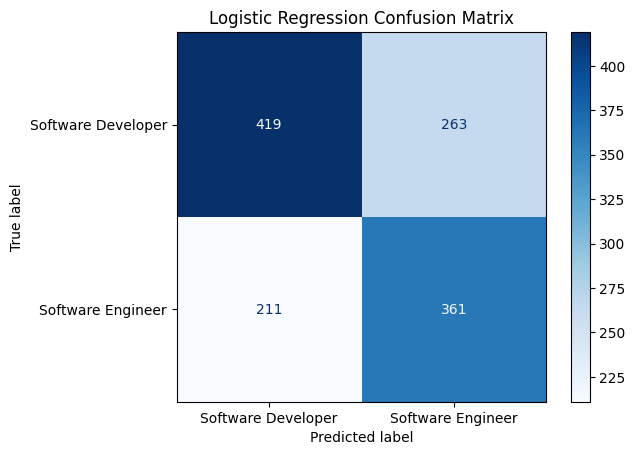


=== Multinomial Naive Bayes ===
Accuracy: 0.6053
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       682
           1       0.57      0.56      0.56       572

    accuracy                           0.61      1254
   macro avg       0.60      0.60      0.60      1254
weighted avg       0.60      0.61      0.60      1254



c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


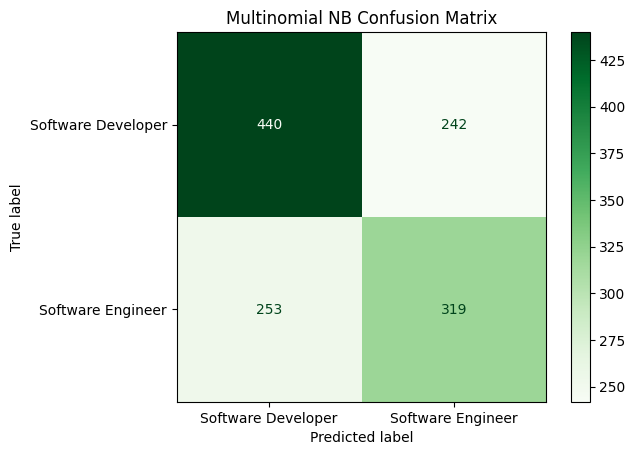

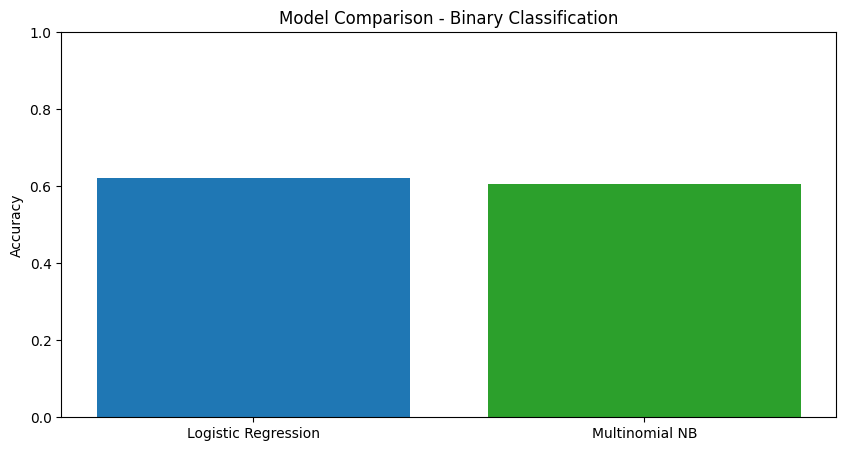

In [18]:
# ================== Regression TAB Code ==================
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ================== Data Preparation ==================
# Create binary classification dataset from existing data
# Let's consider two most common job roles
top_jobs = df['SuggestedJobRole'].value_counts().index[:2]
binary_df = df[df['SuggestedJobRole'].isin(top_jobs)].copy()

# Verify binary classes
print("Class distribution:\n", binary_df['SuggestedJobRole'].value_counts())

# Define features and target
X_bin = binary_df.drop('SuggestedJobRole', axis=1)
y_bin = LabelEncoder().fit_transform(binary_df['SuggestedJobRole'])

# Split data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_bin, y_bin, test_size=0.3, random_state=42
)
# ================== Print Data Samples ==================
print("\n=== Training Data Samples ===")
print("Features (First 5 samples):")
print(X_train_bin.head())
print("\nTarget (First 5 samples):")
print(pd.Series(y_train_bin, name="Target").head().map({0: top_jobs[0], 1: top_jobs[1]}))

print("\n=== Testing Data Samples ===")
print("Features (First 3 samples):")
print(X_test_bin.head(3))
print("\nTarget (First 3 samples):")
print(pd.Series(y_test_bin, name="Target").head(3).map({0: top_jobs[0], 1: top_jobs[1]}))

# Class distribution in splits
print("\n=== Class Distribution ===")
print("Training Set:")
print(pd.Series(y_train_bin).value_counts().rename({0: top_jobs[0], 1: top_jobs[1]}))
print("\nTesting Set:")
print(pd.Series(y_test_bin).value_counts().rename({0: top_jobs[0], 1: top_jobs[1]}))

# ================== Preprocessing Pipeline ==================
# Modified pipeline for regression problem
preprocessor_bin = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
        ('text', CountVectorizer(
            tokenizer=lambda x: x.split(", "), 
            max_features=200,
            binary=True
        ), 'keywords')
    ],
    remainder='drop'
)

# ================== Logistic Regression ==================
# Create pipeline with preprocessing and logistic regression
logreg_pipe = make_pipeline(
    preprocessor_bin,
    LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
)

logreg_pipe.fit(X_train_bin, y_train_bin)

# Evaluate Logistic Regression
y_pred_logreg = logreg_pipe.predict(X_test_bin)
logreg_acc = accuracy_score(y_test_bin, y_pred_logreg)

print("\n=== Logistic Regression ===")
print(f"Accuracy: {logreg_acc:.4f}")
print(classification_report(y_test_bin, y_pred_logreg))

# Confusion Matrix
cm_logreg = confusion_matrix(y_test_bin, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg,display_labels=top_jobs)
disp_logreg.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# ================== Multinomial Naive Bayes ==================
# Create pipeline for MNB (using same preprocessing)
mnb_pipe = make_pipeline(
    preprocessor_bin,
    MultinomialNB(alpha=0.1)
)

mnb_pipe.fit(X_train_bin, y_train_bin)

# Evaluate MNB
y_pred_mnb = mnb_pipe.predict(X_test_bin)
mnb_acc = accuracy_score(y_test_bin, y_pred_mnb)

print("\n=== Multinomial Naive Bayes ===")
print(f"Accuracy: {mnb_acc:.4f}")
print(classification_report(y_test_bin, y_pred_mnb))

# Confusion Matrix
cm_mnb = confusion_matrix(y_test_bin, y_pred_mnb)
disp_mnb = ConfusionMatrixDisplay(confusion_matrix=cm_mnb,
                                display_labels=top_jobs)
disp_mnb.plot(cmap='Greens')
plt.title('Multinomial NB Confusion Matrix')
plt.show()

# ================== Model Comparison ==================
plt.figure(figsize=(10, 5))
models = ['Logistic Regression', 'Multinomial NB']
accuracies = [logreg_acc, mnb_acc]
plt.bar(models, accuracies, color=['#1f77b4', '#2ca02c'])
plt.ylim(0, 1)
plt.title('Model Comparison - Binary Classification')
plt.ylabel('Accuracy')
plt.show()